# trabajo semanal 3
## analisis de fourier:FFT,desparramo, interpolacion y ventaneo
### Francisco Mato
## introduccion
a la hora de usar la tranformada de fourier discreta, es decir con un numero de muestras discretas, pueden llegar suceder fenomenos que son dificiles de explicar con una analisis de fourier continuo,ya que solo suceden en el mundo discreto. uno de estos fenomenos es el desparramo espectral, el cual genera que la la energia en frecuenca de una señal se desparrame en todo el espectro de frecuencia, haciendo que sea dificil poder estimar frecuencias y amplitudes de distintas señales.

este fenomeno es debido a que la tranformada de fourier en el mundo discreto hace que la señal de entrada se multiplicada por una ventana rectangular implicita de la forma
\begin{equation}
w(n)= \left\{ \begin{array}{lcc}  1 & si & n \geq 0 \\ 0 & si & n >N  \end{array} \right.
\end{equation}
con N siendo el numero de muestras validas.
al ventanear la señal hace que al pasarla al dominios de frecuencia,la señal de entrada en frecuencias sea convolucionada por una sinc.pero la ventana implicita no es  cualquier sinc sino que es un Karnel de dishlet en el dominio de frecuencia, la cual tiene la siguiente forma
\begin{equation}
w(k)= \frac{sin(\pi*k)}{sin(\frac{\pi*k}{N})}*\phi(k)
\end{equation}
siendo $\phi(k)$ la fase de la señal que no nos interesa mucho porque vamos a estar trabajando en modulo (y el modulo de la fase es 1), si graficamos el modulo veremos que el grafico tiene los cruzes por 0 en los enteros exepto en el 0.
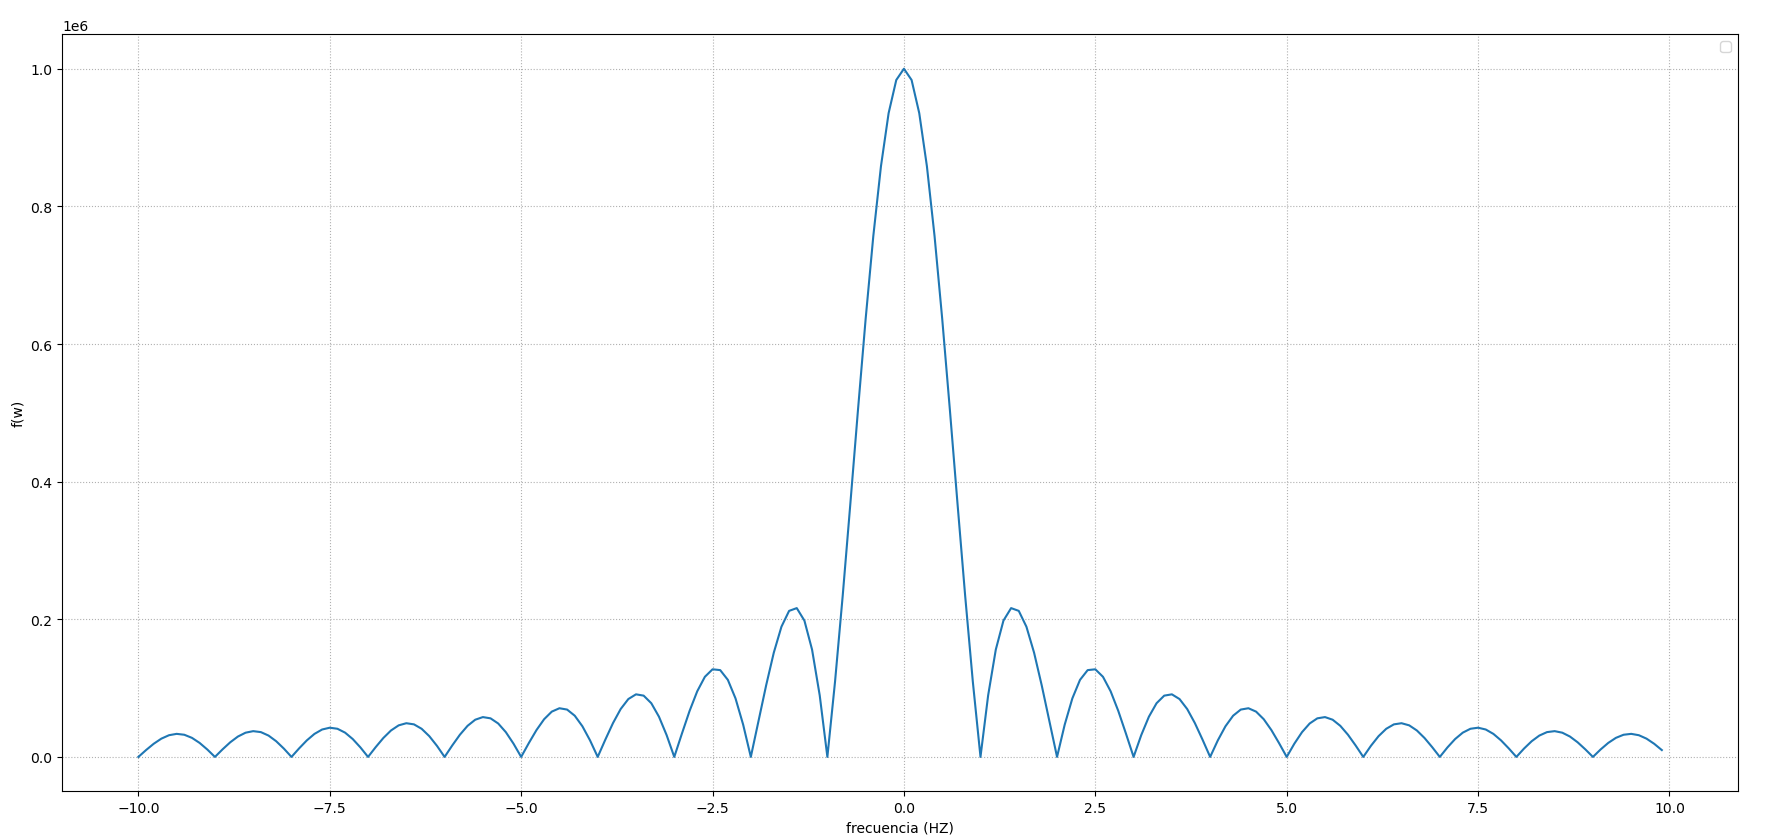 
el interpolar por zero padding hace que en la señal que le metemos a la DFT se extienda a muchas muestras, pero que valen 0, para hacer que la resolucion espectral de la señal se mucha mas grande y por ende vamos a tener un espectro de frecuencias mucho mayor por lo que seran visibles mas frecuencias que quizas no eran visibles por la resolucion espectral anterior.

## analisis y desarrollo

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft


nn=100
fs=nn
deltaf=fs/nn

t=np.arange(0,(nn)/fs,1/fs)
y=np.sin(np.pi*2*(nn/4)*t)
dev_y=np.std(y)
y=y/dev_y

z=np.sin(np.pi*2*((nn/4)+0.25)*t)
dev_z=np.std(z)
z=z/dev_z

w=np.sin(np.pi*2*((nn/4)+0.5)*t)
dev_w=np.std(w)
w=w/dev_w

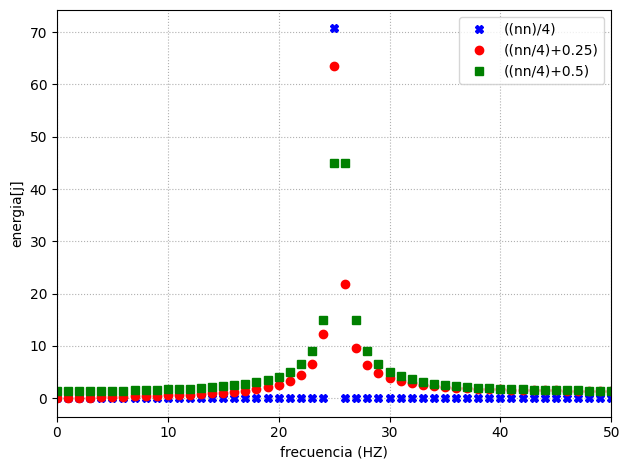

In [27]:
fftY=np.fft.fft(y)
fftZ=np.fft.fft(z)
fftW=np.fft.fft(w)

ffYabs=np.abs(fftY)
ffZabs=np.abs(fftZ)
ffWabs=np.abs(fftW)

plt.figure(1)
plt.clf

ff=np.arange(nn)*deltaf #escala el eje en frecuencia no normalizada por resolucion espectral
                        #para pasar de eje de muestra a frecuencia, multiplico n por la resolucion espectral
plt.plot(ff,ffYabs, label="((nn)/4)",linestyle='',marker='X' ,color='b')

plt.plot(ff,ffZabs, label="((nn/4)+0.25)",linestyle='',marker='o' ,color='r')

plt.plot(ff,ffWabs, label="((nn/4)+0.5)",linestyle='',marker='s' ,color='g')


plt.legend()
plt.grid(True, linestyle=':') 
plt.xlabel('frecuencia (HZ)')
plt.ylabel('energia[j]')
plt.xlim(0,nn/2)
#plt.axis([0,nn/2,0,10000]
plt.draw()
plt.tight_layout() 

plt.show()

en el grafico de arriba podemos entender de mejor manera como afecta el efecto desparramo espectral a la senoidal tranformada por fourier,a simple vista podemos ver como la energia maxima de la señal en las dos frecuencias mayores a nn/4 es reducida en los picos de las frecuencias, pero esto conserva sentido ya que la energia total del sistema se distribuyo en todo el espectro de frecuencia.
lo segundo que podemos pensar es el porque sucede eso. para ello tenemos que tener en cuenta que el $\Delta$f=1 es decir que tenemos graficadas frecuencias en el dominio de los naturales(no tomamos frecuencias negativas),esto es inportante para entender que, al hacer la tranformada fourier y convolucionar la senoidal por la ventana rectangular en el dominio espectral, vamos a obtener el karnel de dishlet desfasada la frecuencia de la senoidal, por lo que nuestra señal de salida es:
\begin{equation}
s(k)= \frac{sin(\pi*(k-nn/4))}{sin(\frac{\pi*(k-nn/4)}{N})}
\end{equation}
si buscamos cuando la salida es 0 obtemos que
\begin{equation}
\pi*(k-nn/4)=z*\pi  \hspace{0.5cm}con \hspace{0.5cm} z\subseteq \mathbb{Z}
\end{equation}
es decir que las soluciones son
\begin{equation}
k=z+nn/4  \hspace{0.5cm}con \hspace{0.5cm} z\subseteq \mathbb{Z}
\end{equation}
ahora podemos ver que para frecuencias enteras no va a ver desparramo ya que todos los valores de frecuencia que tenemos,es decir los $\Delta f*n$, van a ser que la señal de salida sea 0 exepto en la frecuencia. ahora que sucede con frecuencias un poco desfasadas como es el caso de nn/4+0.25 y nn/4+0.5? pues que vamos a ver un efecto de desparramo por que los $\Delta f*n$ no son las soluciones para que la señal de salida sea 0.

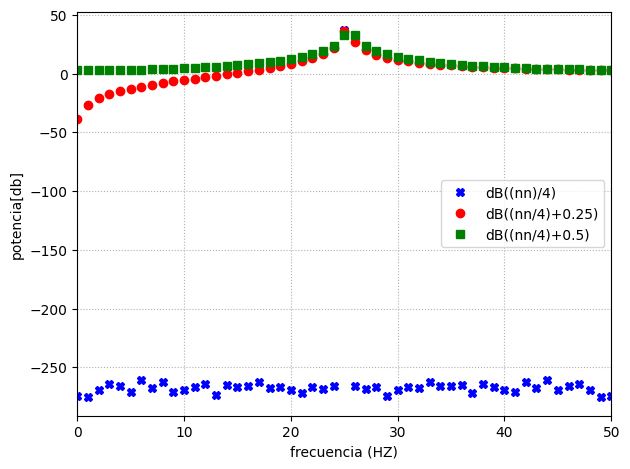

In [28]:
plt.plot(ff,20*np.log10(ffYabs), label="dB((nn)/4)",linestyle='',marker='X' ,color='b')

plt.plot(ff,20*np.log10(ffZabs), label="dB((nn/4)+0.25)",linestyle='',marker='o' ,color='r')

plt.plot(ff,20*np.log10(ffWabs), label="dB((nn/4)+0.5)",linestyle='',marker='s' ,color='g')


plt.legend()
plt.grid(True, linestyle=':') 
plt.xlabel('frecuencia (HZ)')
plt.ylabel('potencia[db]')
plt.xlim(0,nn/2)
#plt.axis([0,nn/2,0,10000]
plt.draw()
plt.tight_layout() 

plt.show()

el anterior grafico muestra como el efecto de desparramo afecta a la densidad espectral de potencia. el fenomeno como habiamos dicho anteriormente desparrama la energia a todas las frecuencias, lo que genera algo a lo que podriamos llamar un tipo de ruido que saca potencia a nuestra señal. esto se ve en el grafico como el piso de ruido de la senoidal de frecuencia nn/4(señal azul) distanciado  250 escalas de magnitud con respecto a la del piso de ruido de la señales de nn/4 +0.25(roja) y nn/4 +0.5(verde). esto hace que a la hora de buscar la amplitud de una señal desconocida que tenga AWG(ruido blanco aditivo) se complique mas la busqueda.

In [29]:
energia_y=np.sum(np.abs(y)**2)
energia_ffy=np.sum(np.abs(fftY)**2)/nn
print("energia de la señal de frecuencia N/4")
print(f"{energia_y:.2f}")
print("energia de tranformada de la señal de frecuencia N/4")
print(f"{energia_ffy:.2f}")
energia_z=np.sum(np.abs(z)**2)
energia_ffz=np.sum(np.abs(fftZ)**2)/nn
print("energia de la señal de frecuencia N/4")
print(f"{energia_z:.6f}")
print("energia de tranformada de la señal de frecuencia N/4+0.25")
print(f"{energia_ffz:.6f}")
energia_w=np.sum(np.abs(w)**2)
energia_ffw=np.sum(np.abs(fftW)**2)/nn
print("energia de la señal de frecuencia N/4+0.5")
print(f"{energia_w:.2f}")
print("energia de tranformada de la señal de frecuencia N/4+0.5")
print(f"{energia_ffw:.2f}")

energia de la señal de frecuencia N/4
100.00
energia de tranformada de la señal de frecuencia N/4
100.00
energia de la señal de frecuencia N/4
100.000001
energia de tranformada de la señal de frecuencia N/4+0.25
100.000001
energia de la señal de frecuencia N/4+0.5
100.02
energia de tranformada de la señal de frecuencia N/4+0.5
100.02


los anterirores resultados fueron obtenidos por la identidad parsebal. nos indica que a pesar que la DFT o FFT muliplique implicitamente nuestra señal de entrada por una ventana rectangular, la energia de la señal de entrada no se vera afectada,esto podria llegar a ser poco intuitivo ya que multiplicar por una ventana hace que la señal de entrada pierda energia.
ademas no importa a la frecuencia a la que este la señal de entrada,parsebal se seguira cumpliendo, esto puede sonar logico pero al ver los graficos de las señales desparramadas uno no pensaria que tenga la misma energia que la de la señal de entrada que la del espectro desparramado. 

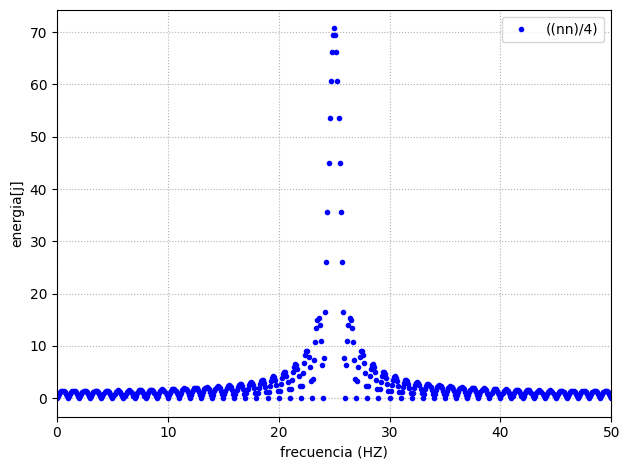

In [30]:
fftY=np.fft.fft(y,n=10*nn)
fftZ=np.fft.fft(z,n=10*nn)
fftW=np.fft.fft(w,n=10*nn)

ffYabs=np.abs(fftY)
ffZabs=np.abs(fftZ)
ffWabs=np.abs(fftW)

plt.figure(1)
plt.clf

ff=np.arange(10*nn)*fs/(10*nn) #escala el eje en frecuencia no normalizada por resolucion espectral
                        #para pasar de eje de muestra a frecuencia, multiplico n por la resolucion espectral 



plt.plot(ff,ffYabs, label="((nn)/4)",linestyle='',marker='.' ,color='b')




plt.legend()
plt.grid(True, linestyle=':') 
plt.xlabel('frecuencia (HZ)')
plt.ylabel('energia[j]')
plt.xlim(0,nn/2)
#plt.axis([0,nn/2,0,10000]
plt.draw()
plt.tight_layout() 

plt.show()

la finalidad del zero-padding va a ser el de aumentar la reolucion espectral, agragegando muestras la  cuales valen 0 cuando termina la señal de entrada,exactamente agregamos nn*9 muestras. haciendo que la nueva ventana rectangular tenga la siguiente forma:
\begin{equation}
w(n)= \left\{ \begin{array}{lcc}1 & si & n \geq 0 \\ 0 & si & n >10*N  \end{array} \right.
\end{equation}
esto hace que la resolucion espectral pase a ser igual a 
\begin{equation}
\Delta f= \frac{f_s}{10*N}=\frac{1}{10}=0.1
\end{equation}
al aumentar la resolucion espectral hace que entre dos frecuencias enteras $w_0$ y $w_0+1$ hayan diez frecuencias mas.¿como afecta esto al fenomeno de desparramo?, pues que hace mas visible el fenomeno para las frecuencias enteras. como se ve en la imagen anterior cuando graficabamos con un $\Delta f$=1 no era visible el kernel de dishlet desfasado, por que los cruzes de 0 coincidian con con los $\Delta f*n$,pero ahora que aumento la resolucion espectral (reducimos el $\Delta f$) el fenomeno ahora es mas visible porque los puntos  de la señal  de salida no son solo los cruzes por 0 si no que tambien comprenden los lobulos secundarios del kernel de dishlet.

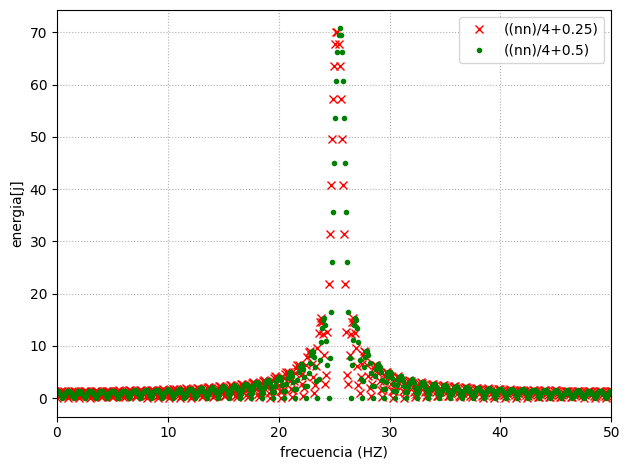

In [31]:

plt.plot(ff,ffZabs, label="((nn)/4+0.25)",linestyle='',marker='x' ,color='r')


plt.plot(ff,ffWabs, label="((nn)/4+0.5)",linestyle='',marker='.' ,color='g')

plt.legend()
plt.grid(True, linestyle=':') 
plt.xlabel('frecuencia (HZ)')
plt.ylabel('energia[j]')
plt.xlim(0,nn/2)
#plt.axis([0,nn/2,0,10000]
plt.draw()
plt.tight_layout() 

plt.show()

en el casos de la frecuencias no enteras,el fenomeno que ya era visible ahora simplemente se podran denotar mas los lobulos secundarios.

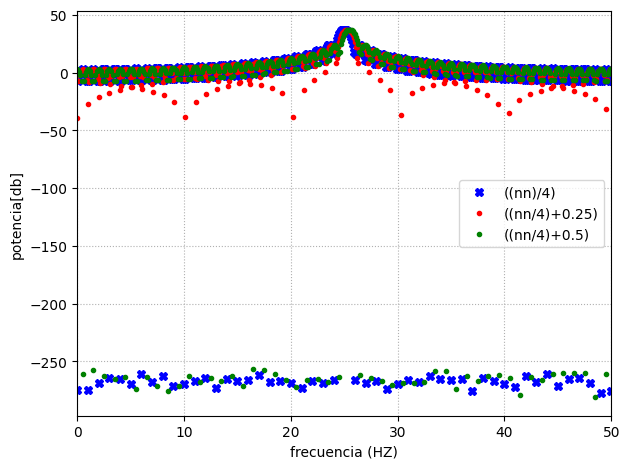

In [32]:
plt.plot(ff,20*np.log10(ffYabs), label="((nn)/4)",linestyle='',marker='X' ,color='b')

plt.plot(ff,20*np.log10(ffZabs), label="((nn/4)+0.25)",linestyle='',marker='.' ,color='r')

plt.plot(ff,20*np.log10(ffWabs), label="((nn/4)+0.5)",linestyle='',marker='.' ,color='g')


plt.legend()
plt.grid(True, linestyle=':') 
plt.xlabel('frecuencia (HZ)')
plt.ylabel('potencia[db]')
plt.xlim(0,nn/2)
#plt.axis([0,nn/2,0,10000]
plt.draw()
plt.tight_layout() 

plt.show()

el resultado en densidad espectral de potencia de hacer zero-padding,va a ser que en el caso de la frecuencia de nn/4 genere dos pisos de ruido, uno que es el que ya estaba de -250db y uno nuevo consecuencia de ver los lobulos secundarios del kernel de dishlet por aumentar la resolucion espectral, generando un piso de ruido de 0db, es decir que tenemos dos piso de ruido con una diferencia de 250 ordenes de magnitud.
con respecto a las frecuencias de nn/4+0.25 y nn/4+0.5.la segunda tendra, al igual que la señal de nn/4, dos pisos de ruido con una diferencia de 250 ordenes de magnitud, mientras que la primera seguira teniendo un piso de ruido entre -50db a 0db, no llega nunca a -250db por que el espectro en frecuencia nunca alcanza (o se acerca mucho) el 0.

In [33]:
energia_y=np.sum(np.abs(y)**2)
energia_ffy=np.sum(np.abs(fftY)**2)/(10*nn)
print("energia de la señal de frecuencia N/4")
print(f"{energia_y:.2f}")
print("energia de tranformada de la señal de frecuencia N/4")
print(f"{energia_ffy:.2f}")
energia_z=np.sum(np.abs(z)**2)
energia_ffz=np.sum(np.abs(fftZ)**2)/(10*nn)
print("energia de la señal de frecuencia N/4")
print(f"{energia_z:.6f}")
print("energia de tranformada de la señal de frecuencia N/4+0.25")
print(f"{energia_ffz:.6f}")
energia_w=np.sum(np.abs(w)**2)
energia_ffw=np.sum(np.abs(fftW)**2)/(10*nn)
print("energia de la señal de frecuencia N/4+0.5")
print(f"{energia_w:.2f}")
print("energia de tranformada de la señal de frecuencia N/4+0.5")
print(f"{energia_ffw:.2f}")

energia de la señal de frecuencia N/4
100.00
energia de tranformada de la señal de frecuencia N/4
100.00
energia de la señal de frecuencia N/4
100.000001
energia de tranformada de la señal de frecuencia N/4+0.25
100.000001
energia de la señal de frecuencia N/4+0.5
100.02
energia de tranformada de la señal de frecuencia N/4+0.5
100.02


al igual que pasaba con las señales sin zero-padding el ventaneado no afectaba a la energia.con zero-padding sucede los mismo ya que al escalar la energia en frecuencia de la señal por el factor de N que va a ser igual por zero-padding a 10*nn, hace que se mantenga la relacion.y ademas si comparamos la energias con zero-padding y sin, estas resultan ser las mismas.

## conclucion
el fenomeno de desparramo surge de que al hacer la tranformada discreta de fourier de una señal, esta sea multiplicada por una ventana rectangular de igual n(igual muestras) haciendo que la tranfromada de la señal de entrada se convolucione por el kernel de dishlet, la cual es un tipo de sinc.este efecto puede ser omitido cuando se tiene una resolucion espectral tal que los $\Delta f*n$ sean iguales a los cruzes por zero del kernel de dislet haciendo inpeceptible los lobulos secundarios como el principal de la ventana tranformada,para ello nos resulta util el zero-padding, al generar una resolucion espectral mas grande podemos ver de forma grafica frecuencias armonicas la cuales no podriamos ver con una resolucion espectral mas baja, en este experimento se comprobo como a partir de aumentar 10 veces la resolucion espectral fuimos capaces de ver el kernel de dishlet oculto en resoluciones mas bajas.
ademas obtuvimos un resultado que es contraintuitivo,el ventaneado implicito no afecta la energia de la señal de entrada,esto es contraintuitivo ya que normalmente al ventanear una señal esta llaga a perder energia. esto se vio al haber hecho parsebal y notar que este ultimo se cumple.lo mismo sucede cuando hacemos zero-padding, al aumentar la resolucion espectral se sigue cumpliendo parsebal.